<a id="top"></a>
# Brainstorm Final Project  
Predicting Customer Churn for Subscription-based Media Company

Author: Jon Sweeney  
Version: 1.0  

### Summary  
In this project, I will go through various steps to clean, analyze, and make predictions whether or not a customer is about to cancel their subscription.

<ul>
<li><a href="#source">Source a Dataset</a></li>
<li><a href="#hypothesis">Formulate a Hypothesis</a></li>
<li><a href="#datacleaning">Data Cleaning</a></li>
<li><a href="#model">Numerical Model</a></li>
<li><a href="#apply">Applying Models</a></li>
<li><a href="#conclusions">Insights</a></li>
</ul>

## Libraries 

These are the libraries that will be used throughout the project.


In [199]:
import os  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import tree
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 60)

%matplotlib inline

<a id="source"></a>
## Source a Dataset  
The synthetic data was provided by [Safrin S on Kaggle](https://www.kaggle.com/datasets/safrin03/predictive-analytics-for-customer-churn-dataset/data).  

The data aims to mock data for a fictional company providing a supscription-based service. Customer churn, the rate at which customers cancel their service, is an important metric for these type of businesses. Predictive analytic techniques are employed to identify customers who are likely to churn so proactive measures can be made to retain customers.

### Files to Load  

> Printing out the files to load.

In [3]:
print('These are the files that were provided by Kaggle:\n')
for root, dirs, files in os.walk('./data/'):
    for file in files:
        if file != '.DS_Store':
            print(file)

These are the files that were provided by Kaggle:

test.csv
train.csv
data_descriptions.csv


* __data_descriptions.csv__: This contains the column descriptions of the test and train data  
* __test.csv__: This file contains the data to be used to test the machine learning algorithms
* __train.csv__: This file contains the data to be used to train the machine learning algorithms

> Loading the files into 3 separate data frames. The test data should stay separate from the train data. The data description file should only be referenced.

In [4]:
train_raw_df = pd.read_csv('data/train.csv')
test_raw_df = pd.read_csv('data/test.csv')
desc_df = pd.read_csv('data/data_descriptions.csv')

> Here are the descriptions for the test and train data variables

In [5]:
desc_df

Column_name Column_type Data_type  \
0                 AccountAge     Feature   integer   
1             MonthlyCharges     Feature     float   
2               TotalCharges     Feature     float   
3           SubscriptionType     Feature    object   
4              PaymentMethod     Feature    string   
5           PaperlessBilling     Feature    string   
6                ContentType     Feature    string   
7          MultiDeviceAccess     Feature    string   
8           DeviceRegistered     Feature    string   
9        ViewingHoursPerWeek     Feature     float   
10    AverageViewingDuration     Feature     float   
11  ContentDownloadsPerMonth     Feature   integer   
12           GenrePreference     Feature    string   
13                UserRating     Feature     float   
14    SupportTicketsPerMonth     Feature   integer   
15                    Gender     Feature    string   
16             WatchlistSize     Feature     float   
17           ParentalControl     Feature    string   
18          SubtitlesEnabled     Feature    string   
19                CustomerID  Identifier    string   
20                     Churn      Target   integer   

                                                                                             Description  
0                                                               The age of the user's account in months.  
1                                                     The amount charged to the user on a monthly basis.  
2                                    The total charges incurred by the user over the account's lifetime.  
3                             The type of subscription chosen by the user (Basic, Standard, or Premium).  
4                                                                The method of payment used by the user.  
5                                Indicates whether the user has opted for paperless billing (Yes or No).  
6                                 The type of content preferred by the user (Movies, TV Shows, or Both).  
7                  Indicates whether the user has access to the service on multiple devices (Yes or No).  
8                           The type of device registered by the user (TV, Mobile, Tablet, or Computer).  
9                                         The number of hours the user spends watching content per week.  
10                                              The average duration of each viewing session in minutes.  
11                                                The number of content downloads by the user per month.  
12                                                    The preferred genre of content chosen by the user.  
13                                               The user's rating for the service on a scale of 1 to 5.  
14                                           The number of support tickets raised by the user per month.  
15                                                              The gender of the user (Male or Female).  
16                                                          The number of items in the user's watchlist.  
17                               Indicates whether parental control is enabled for the user (Yes or No).  
18                                     Indicates whether subtitles are enabled for the user (Yes or No).  
19                                                                A unique identifier for each customer.  
20  The target variable indicating whether a user has churned or not (1 for churned, 0 for not churned).

<a id="hypothesis"></a>
<ul>
<li><a href="#top">Back to Top</a></li>  
<li><a href="#source">Source a Dataset</a></li>
<li><a href="#datacleaning">Data Cleaning</a></li>
<li><a href="#model">Numerical Model</a></li>
<li><a href="#apply">Applying Models</a></li>
<li><a href="#conclusions">Insights</a></li>
</ul>

## Formulate a Hypothesis  

__H<sub>0</sub>__: There is no significant relationship between any of the feature variables and customer churn.  
__H<sub>1</sub>__: There is a significant relationship between one or more of the feature variables and customer churn.  

In short, we are attempting to identify at least one variable to be allow accurate prediction for customer churn.

<a id="datacleaning"></a>

## Data Cleaning and Exploratory Data Analysis (EDA) with Visualizations
In this part of the process, I will be exploring, analyzing, and cleaning the data. In addition, visualizations will be created to explore the data.

> Explore the first 5 rows of the test and train data

In [6]:
test_raw_df.head()

AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          38       17.869374    679.036195          Premium   
1          77        9.912854    763.289768            Basic   
2           5       15.019011     75.095057         Standard   
3          88       15.357406   1351.451692         Standard   
4          91       12.406033   1128.949004         Standard   

      PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
0      Mailed check               No    TV Shows                No   
1  Electronic check              Yes    TV Shows                No   
2     Bank transfer               No    TV Shows               Yes   
3  Electronic check               No        Both               Yes   
4       Credit card              Yes    TV Shows               Yes   

  DeviceRegistered  ViewingHoursPerWeek  AverageViewingDuration  \
0               TV            29.126308              122.274031   
1               TV            36.873729               57.093319   
2         Computer             7.601729              140.414001   
3           Tablet            35.586430              177.002419   
4           Tablet            23.503651               70.308376   

   ContentDownloadsPerMonth GenrePreference  UserRating  \
0                        42          Comedy    3.522724   
1                        43          Action    2.021545   
2                        14          Sci-Fi    4.806126   
3                        14          Comedy    4.943900   
4                         6           Drama    2.846880   

   SupportTicketsPerMonth  Gender  WatchlistSize ParentalControl  \
0                       2    Male             23              No   
1                       2  Female             22             Yes   
2                       2  Female             22              No   
3                       0  Female             23             Yes   
4                       6  Female              0              No   

  SubtitlesEnabled  CustomerID  
0               No  O1W6BHP6RM  
1               No  LFR4X92X8H  
2              Yes  QM5GBIYODA  
3              Yes  D9RXTK2K9F  
4               No  ENTCCHR1LR

In [7]:
train_raw_df.head()

AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          20       11.055215    221.104302          Premium   
1          57        5.175208    294.986882            Basic   
2          73       12.106657    883.785952            Basic   
3          32        7.263743    232.439774            Basic   
4          57       16.953078    966.325422          Premium   

      PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
0      Mailed check               No        Both                No   
1       Credit card              Yes      Movies                No   
2      Mailed check              Yes      Movies                No   
3  Electronic check               No    TV Shows                No   
4  Electronic check              Yes    TV Shows                No   

  DeviceRegistered  ViewingHoursPerWeek  ...  ContentDownloadsPerMonth  \
0           Mobile            36.758104  ...                        10   
1           Tablet            32.450568  ...                        18   
2         Computer             7.395160  ...                        23   
3           Tablet            27.960389  ...                        30   
4               TV            20.083397  ...                        20   

   GenrePreference UserRating  SupportTicketsPerMonth  Gender WatchlistSize  \
0           Sci-Fi   2.176498                       4    Male             3   
1           Action   3.478632                       8    Male            23   
2          Fantasy   4.238824                       6    Male             1   
3            Drama   4.276013                       2    Male            24   
4           Comedy   3.616170                       4  Female             0   

   ParentalControl SubtitlesEnabled  CustomerID Churn  
0               No               No  CB6SXPNVZA     0  
1               No              Yes  S7R2G87O09     0  
2              Yes              Yes  EASDC20BDT     0  
3              Yes              Yes  NPF69NT69N     0  
4               No               No  4LGYPK7VOL     0  

[5 rows x 21 columns]

> Just looking at the first 5 rows of each dataset, I can see the __test data__ is missing the `Churn` column and the __train data__ has it. If the __train data__ has enough rows, I will drop the __test dataframe__ and use the __train data__ to split out all of the data.

In [8]:
train_raw_df.shape

(243787, 21)

> The __training data__ has over 240,000 rows. This will be more than enough to split out between test and training data later. 

> The first cleaning step will be clearing out the __test_dataframe__ to prevent and mistake later.

In [9]:
test_raw_df = pd.DataFrame()
# Verify there's no data
test_raw_df.shape

(0, 0)

> Now that the test data is cleared, I will rename the dataframe that I will be working with going forward to prevent future confusion.

In [10]:
df = train_raw_df
df.shape

(243787, 21)

> Viewing more characteristics of the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [12]:
df.describe()

AccountAge  MonthlyCharges   TotalCharges  ViewingHoursPerWeek  \
count  243787.000000   243787.000000  243787.000000        243787.000000   
mean       60.083758       12.490695     750.741017            20.502179   
std        34.285143        4.327615     523.073273            11.243753   
min         1.000000        4.990062       4.991154             1.000065   
25%        30.000000        8.738543     329.147027            10.763953   
50%        60.000000       12.495555     649.878487            20.523116   
75%        90.000000       16.238160    1089.317362            30.219396   
max       119.000000       19.989957    2378.723844            39.999723   

       AverageViewingDuration  ContentDownloadsPerMonth     UserRating  \
count           243787.000000             243787.000000  243787.000000   
mean                92.264061                 24.503513       3.002713   
std                 50.505243                 14.421174       1.155259   
min                  5.000547                  0.000000       1.000007   
25%                 48.382395                 12.000000       2.000853   
50%                 92.249992                 24.000000       3.002261   
75%                135.908048                 37.000000       4.002157   
max                179.999275                 49.000000       4.999989   

       SupportTicketsPerMonth  WatchlistSize          Churn  
count           243787.000000  243787.000000  243787.000000  
mean                 4.504186      12.018508       0.181232  
std                  2.872548       7.193034       0.385211  
min                  0.000000       0.000000       0.000000  
25%                  2.000000       6.000000       0.000000  
50%                  4.000000      12.000000       0.000000  
75%                  7.000000      18.000000       0.000000  
max                  9.000000      24.000000       1.000000

In [13]:
df.sample(5)

AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
131264         118        8.487310   1001.502561          Premium   
230336          18       16.071583    289.288486            Basic   
85046           69       17.609379   1215.047167         Standard   
107932          85       16.218833   1378.600838          Premium   
130160          12        9.169989    110.039868         Standard   

           PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
131264       Credit card               No        Both                No   
230336     Bank transfer               No      Movies               Yes   
85046   Electronic check               No        Both                No   
107932      Mailed check               No        Both                No   
130160      Mailed check               No    TV Shows                No   

       DeviceRegistered  ViewingHoursPerWeek  ...  ContentDownloadsPerMonth  \
131264           Tablet            10.739242  ...                        25   
230336               TV            31.384139  ...                        19   
85046            Mobile             2.076539  ...                         5   
107932           Mobile            34.838487  ...                        36   
130160         Computer             6.943358  ...                        30   

        GenrePreference UserRating  SupportTicketsPerMonth  Gender  \
131264           Action   1.381676                       4  Female   
230336          Fantasy   2.346349                       2  Female   
85046           Fantasy   3.976449                       4    Male   
107932           Sci-Fi   2.481141                       0    Male   
130160            Drama   1.840018                       7  Female   

       WatchlistSize  ParentalControl SubtitlesEnabled  CustomerID Churn  
131264            10              Yes               No  1KBFSHEL22     0  
230336             8               No              Yes  XHR9988MIX     0  
85046              9               No              Yes  2NYOEF53Q3     1  
107932            17               No              Yes  7HFDJ15DYV     1  
130160             2              Yes              Yes  LYOCIX3L18     1  

[5 rows x 21 columns]

> Checking for duplicated data

In [14]:
df.duplicated().sum()

0

> Removing the `CustomerID` column because this should not provide any insights and doing so will fully anonymize the data

In [15]:
df.drop('CustomerID', axis=1, inplace=True)

> It appears that `AccountAge` and `TotalCharges` are very similar. In order to prevent multicollinearity, I will be examining the relationship between the two features.

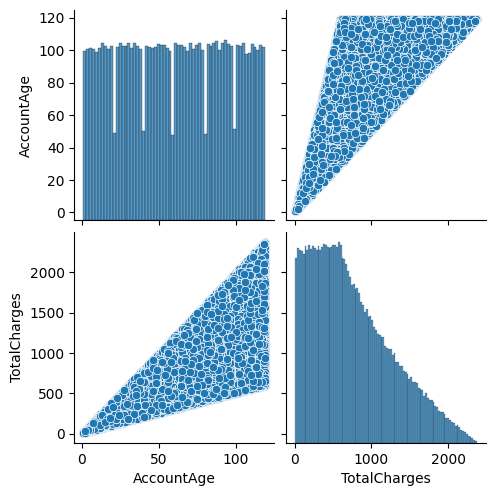

In [16]:
sns.pairplot(df, vars=['AccountAge', 'TotalCharges']);

> It appears that there is a strong 

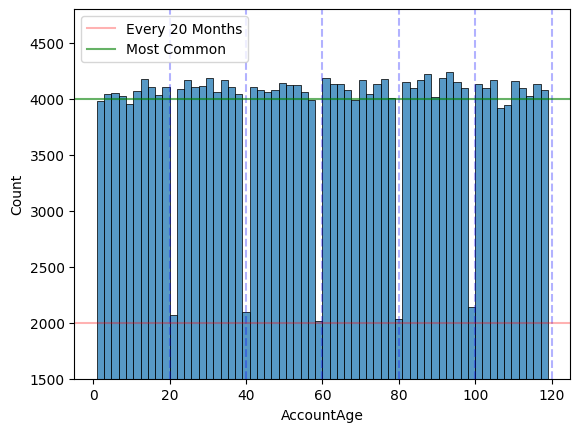

In [17]:
vertical_lines = np.arange(20, 121, 20)

ax = sns.histplot(df['AccountAge'])

for v_line in vertical_lines:
    plt.axvline(x=v_line, color='blue', linestyle='--', alpha=0.3)

plt.axhline(y=2000, color='red', alpha=0.3, label='Every 20 Months')
plt.axhline(y=4000, color='green', alpha=0.6, label='Most Common')
ax.set_ylim(1500, 4800)
plt.legend();

> There is a strange cycle every 20 months where it looks like approximately 50% fewer customers signed up. In a real-world scenario, I would investigate the cause of this behavior. I am ignoring it since the data is synthetic.

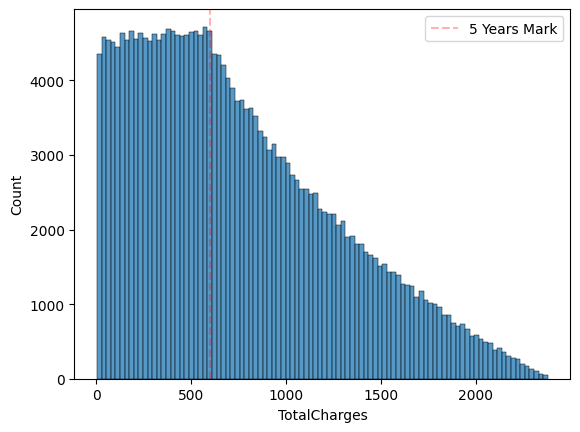

In [18]:
sns.histplot(df['TotalCharges'])
plt.axvline(x=600, color='red', linestyle='--', alpha=0.3, label='5 Years Mark')
plt.legend();

> There appears to be a strong relationship between the two. I like the `TotalCharges` since the every 20 months decline in new accounts for `AccountAge` seems to be less valuable. 

> Inspecting the correlation between the two columns because they appear to be related.

In [19]:
def check_for_correlation(col1, col2='Churn'):
    """ 
    Description
    -----------
    Checks the correlation between two variables in the dataframe

    Parameters
    ----------
    col1 (string): first column to compare
    col2 (string): second column to compare (default = 'Churn')
    """
    correlation = df[col1].corr(df[col2])

    print(f'Correlation Coefficient: {round(correlation, 5)}')

    print(f'There is{" a" if correlation >= 0.7 else " no"} strong correlation between `{col1}` and `{col2}`')

In [20]:
check_for_correlation('AccountAge', 'TotalCharges')

Correlation Coefficient: 0.82014
There is a strong correlation between `AccountAge` and `TotalCharges`


> Since there is a strong correlation between the two, I will drop `AccountAge` to avoid multicollinearity.

In [21]:
df.drop('AccountAge', axis=1, inplace=True)
df.head()

MonthlyCharges  TotalCharges SubscriptionType     PaymentMethod  \
0       11.055215    221.104302          Premium      Mailed check   
1        5.175208    294.986882            Basic       Credit card   
2       12.106657    883.785952            Basic      Mailed check   
3        7.263743    232.439774            Basic  Electronic check   
4       16.953078    966.325422          Premium  Electronic check   

  PaperlessBilling ContentType MultiDeviceAccess DeviceRegistered  \
0               No        Both                No           Mobile   
1              Yes      Movies                No           Tablet   
2              Yes      Movies                No         Computer   
3               No    TV Shows                No           Tablet   
4              Yes    TV Shows                No               TV   

   ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth  \
0            36.758104               63.531377                        10   
1            32.450568               25.725595                        18   
2             7.395160               57.364061                        23   
3            27.960389              131.537507                        30   
4            20.083397               45.356653                        20   

  GenrePreference  UserRating  SupportTicketsPerMonth  Gender  WatchlistSize  \
0          Sci-Fi    2.176498                       4    Male              3   
1          Action    3.478632                       8    Male             23   
2         Fantasy    4.238824                       6    Male              1   
3           Drama    4.276013                       2    Male             24   
4          Comedy    3.616170                       4  Female              0   

  ParentalControl SubtitlesEnabled  Churn  
0              No               No      0  
1              No              Yes      0  
2             Yes              Yes      0  
3             Yes              Yes      0  
4              No               No      0

> Next, I do not care for the granularity for the float data type variables. In addition, I'm not sure how a user is billed a ten thousandths of a penny. For these float variable, I will round to `2` decimal places.

In [22]:
float_variables = []

for col in df.columns:
    if np.dtype(df[col]) == float:
        float_variables.append(col)
        df[col] = df[col].round(2)

df[float_variables].sample(5)

MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
98453            19.34        619.03                15.08   
198749           14.91       1655.43                17.94   
38524            15.77         31.54                26.93   
81382            12.39       1115.02                21.85   
9587             12.43        111.91                12.96   

        AverageViewingDuration  UserRating  
98453                   143.33        3.99  
198749                   42.65        1.90  
38524                   174.08        3.23  
81382                    25.56        4.11  
9587                     33.50        1.66

> Now let's do a pair plot over the whole dataframe to see if there are any relationships jumping out.

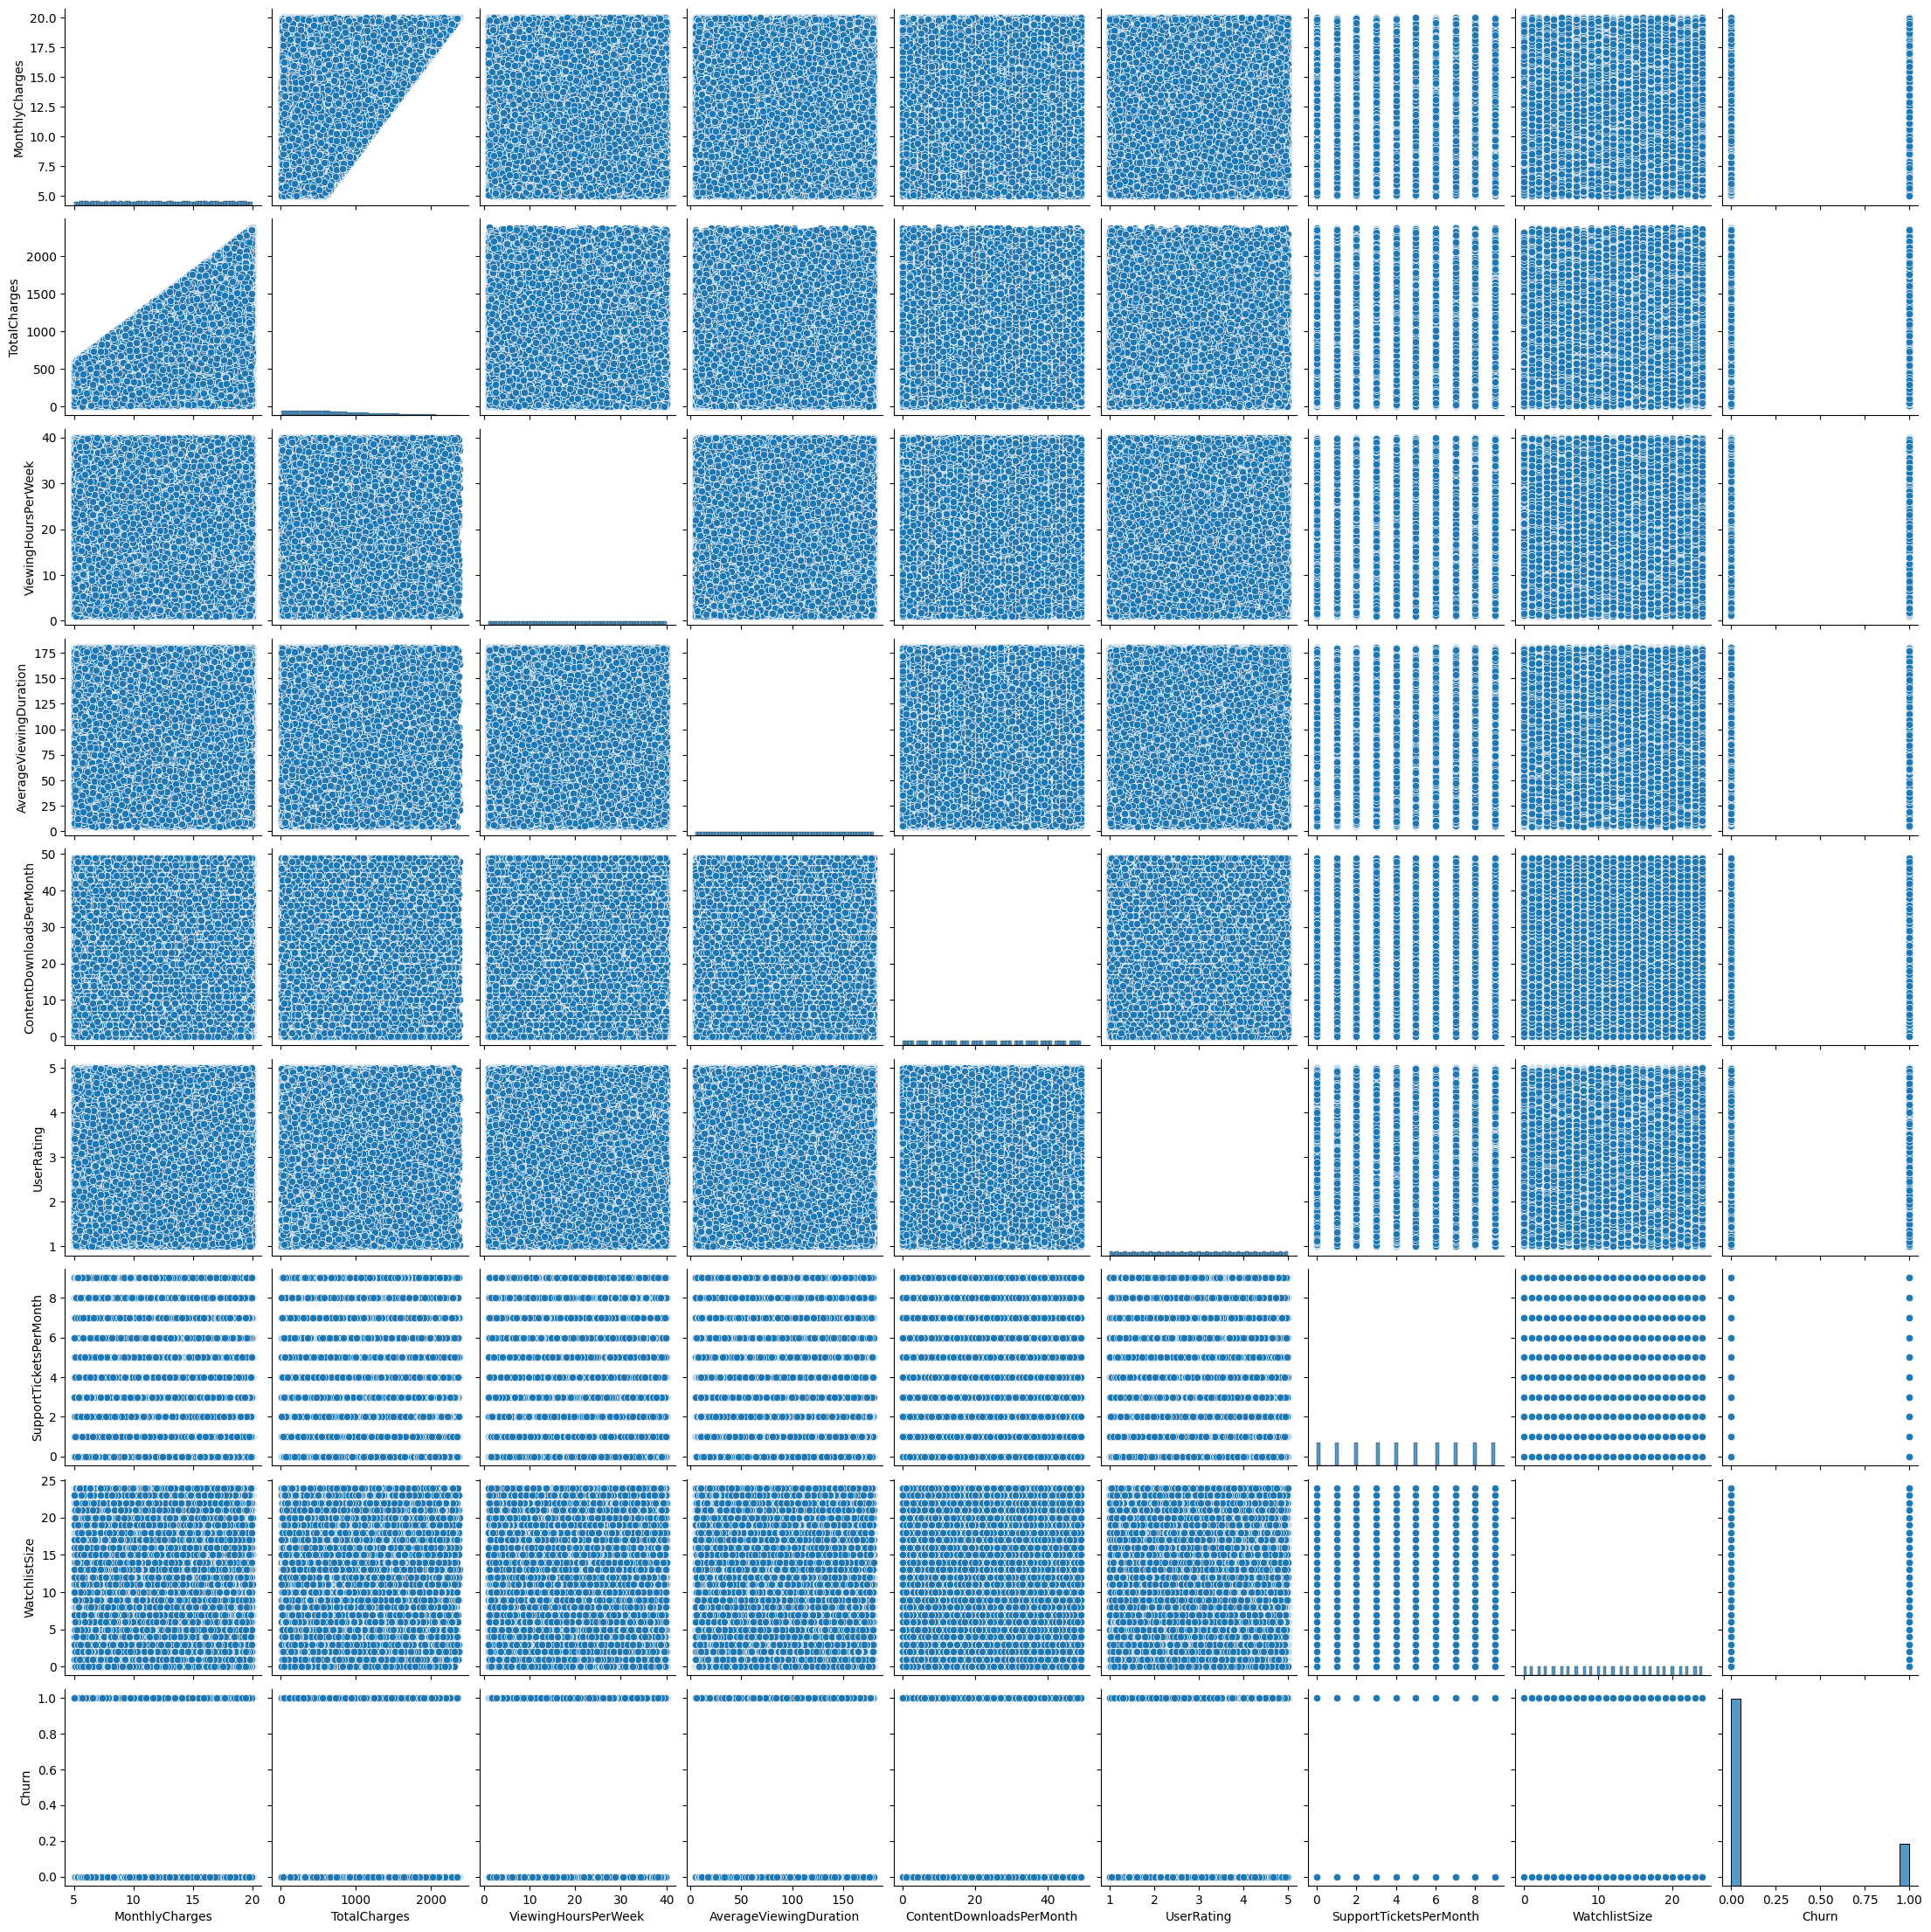

In [23]:
sns.pairplot(df);

> I don't see any strong relationships betwen any two variables. Will start examining the variables individually

### MonthlyCharges

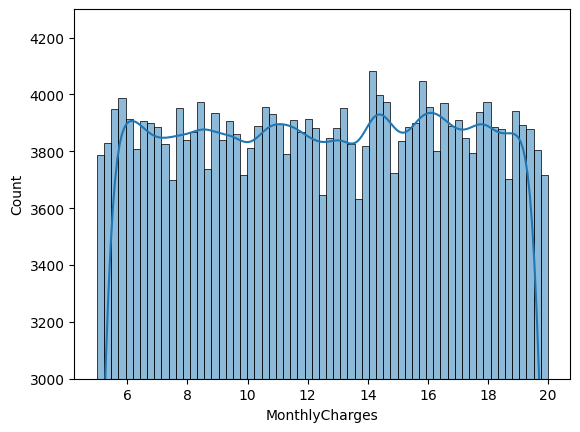

In [24]:
ax = sns.histplot(df['MonthlyCharges'], kde=True)
ax.set_ylim(3000, 4300);

> Looks like the monthly charge amount is evenly distributed for all customers.

In [25]:
check_for_correlation('MonthlyCharges')

Correlation Coefficient: 0.10047
There is no strong correlation between `MonthlyCharges` and `Churn`


> There does not seem to be a strong relationship between monthly charges and customer churn.

## TotalCharges

In [26]:
check_for_correlation('TotalCharges')

Correlation Coefficient: -0.12053
There is no strong correlation between `TotalCharges` and `Churn`


> There does not appear to be a strong relationship between churn and TotalCharges

## ViewingHoursPerWeek

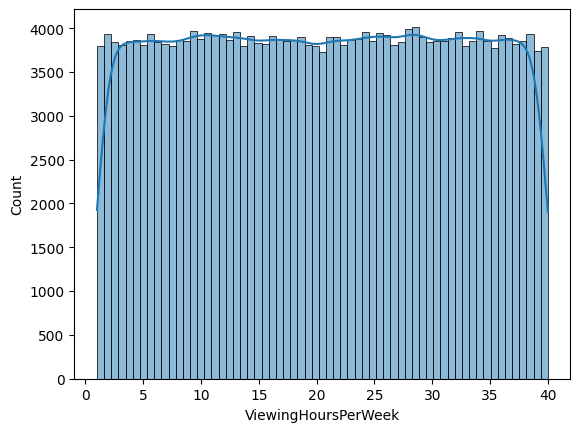

In [27]:
sns.histplot(df['ViewingHoursPerWeek'], kde=True);

> Again, the data appears to be evenly distributed.

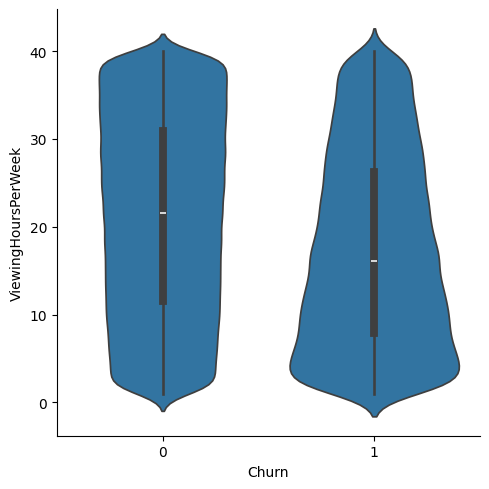

In [28]:
sns.catplot(train_raw_df, x='Churn', y='ViewingHoursPerWeek', kind='violin');

In [29]:
check_for_correlation('ViewingHoursPerWeek');

Correlation Coefficient: -0.12865
There is no strong correlation between `ViewingHoursPerWeek` and `Churn`


## AverageViewingDuration

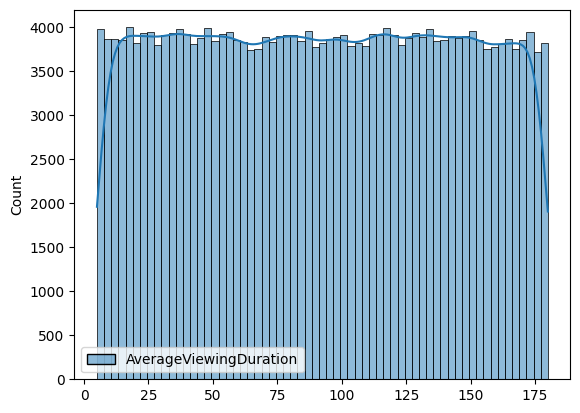

In [30]:
sns.histplot(df[['AverageViewingDuration']], kde=True);

> Looks like Average Viewing Duration is also evenly distributed.

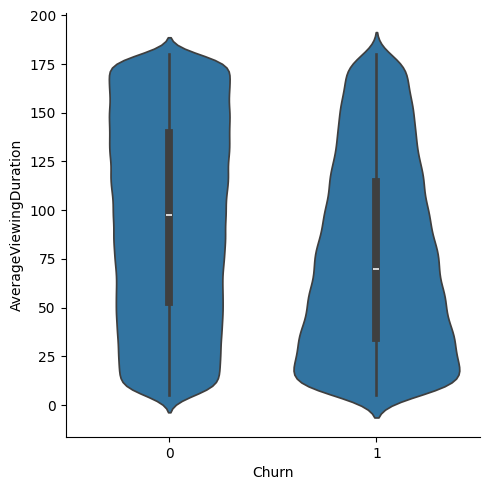

In [31]:
sns.catplot(df, x='Churn', y='AverageViewingDuration', kind='violin');

> It appears that the longer a user is watching on average, the less likely for someone to cancel.

In [32]:
check_for_correlation('AverageViewingDuration')

Correlation Coefficient: -0.1469
There is no strong correlation between `AverageViewingDuration` and `Churn`


## ContentDownloadsPerMonth

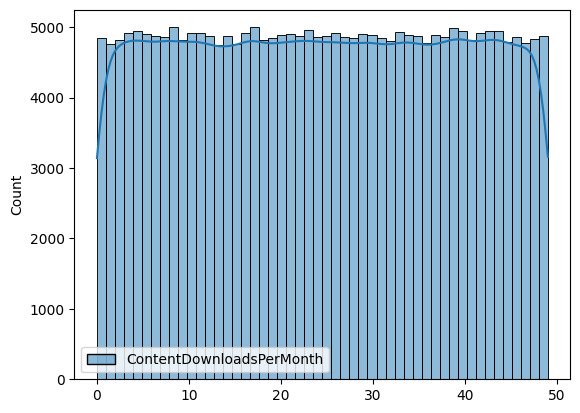

In [33]:
sns.histplot(df[['ContentDownloadsPerMonth']], kde=True, bins=50);

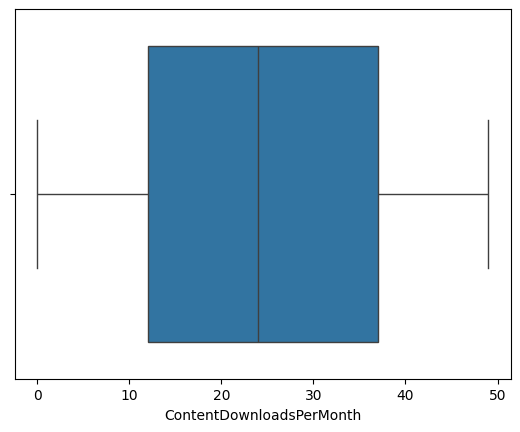

In [34]:
sns.boxplot(df, x='ContentDownloadsPerMonth');

> Again, the data looks to be evenly distributed.

In [35]:
check_for_correlation('ContentDownloadsPerMonth')

Correlation Coefficient: -0.12975
There is no strong correlation between `ContentDownloadsPerMonth` and `Churn`


## GenrePreference

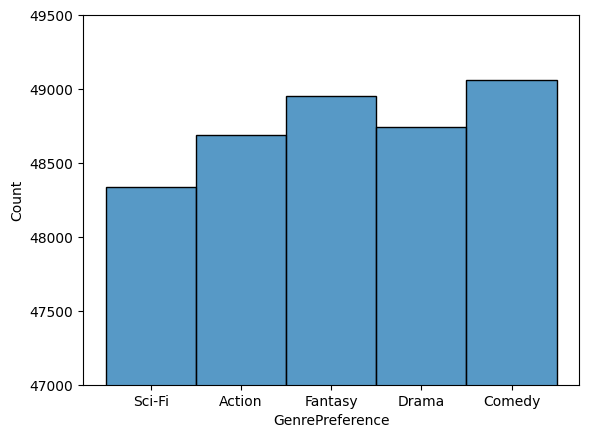

In [36]:
ax = sns.histplot(df, x='GenrePreference')
ax.set_ylim(47_000, 49_500);

<Axes: xlabel='GenrePreference', ylabel='count'>

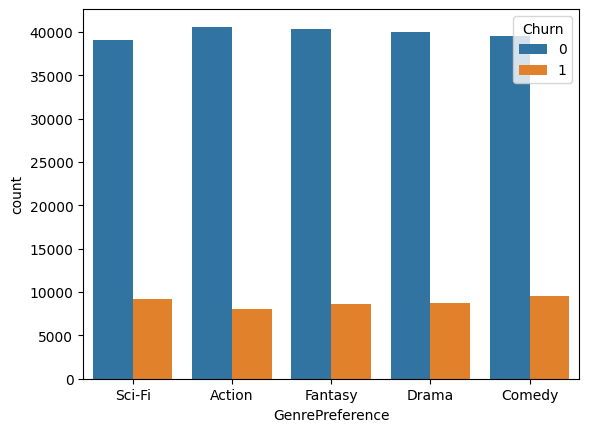

In [37]:
sns.countplot(df, x='GenrePreference', hue='Churn')

> The GenrePreference data appears to be evenly distributed. There appears to be small differences in the rates of churn across the different genres.

## UserRating

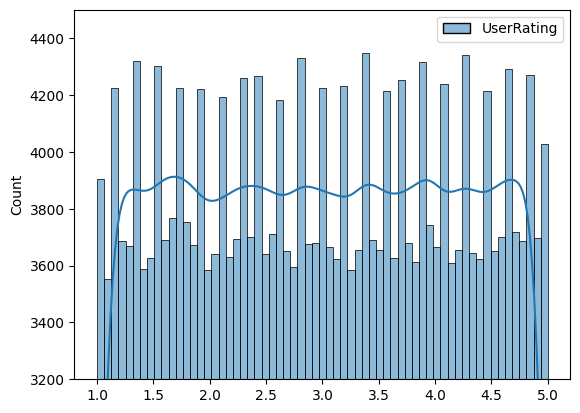

In [38]:
ax = sns.histplot(df[['UserRating']], kde=True)
ax.set_ylim(3200, 4500);

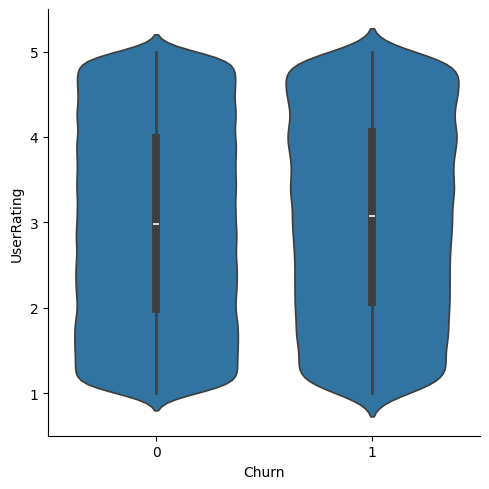

In [39]:
sns.catplot(df, x='Churn', y='UserRating', kind='violin');

> I am kind of surprised how similar the two violine plots are between users who canceled or not. 

In [40]:
check_for_correlation('UserRating')

Correlation Coefficient: 0.02212
There is no strong correlation between `UserRating` and `Churn`


## SupportTicketsPerMonth

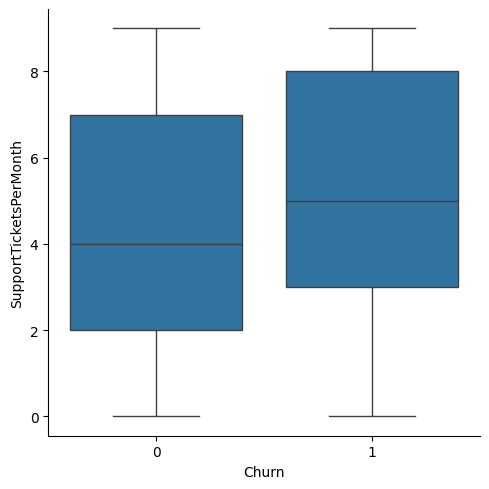

In [41]:
sns.catplot(df, x='Churn', y='SupportTicketsPerMonth', kind='box');

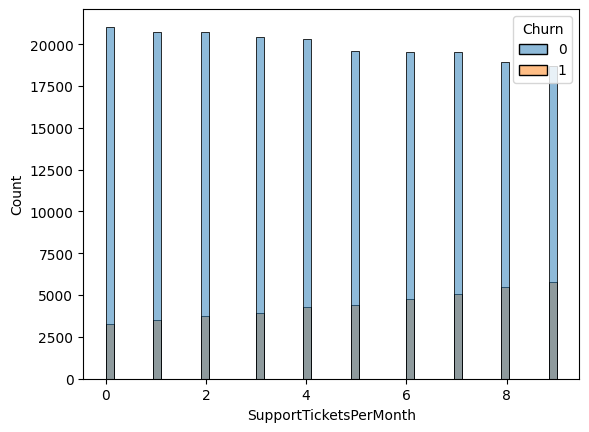

In [42]:
sns.histplot(df, x='SupportTicketsPerMonth', hue='Churn');

> It appears that there is a slight increase in churn as the number of support tickets increase.

In [43]:
check_for_correlation('SupportTicketsPerMonth')

Correlation Coefficient: 0.08406
There is no strong correlation between `SupportTicketsPerMonth` and `Churn`


## Gender

In [44]:
def plot_binary_data(dataframe, x, hue='Churn'):
    """
    Plots Binary Data with Annotations

    Parameters
    ----------
    dataframe (pandas dataframe): data
    x (string): Dataframe's column name to plot
    hue (string): Dataframe's column name to be used as the hue or to separate within x variable
    """
    plot = sns.histplot(dataframe, x=x, hue=hue)

    for p in plot.patches:
        plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

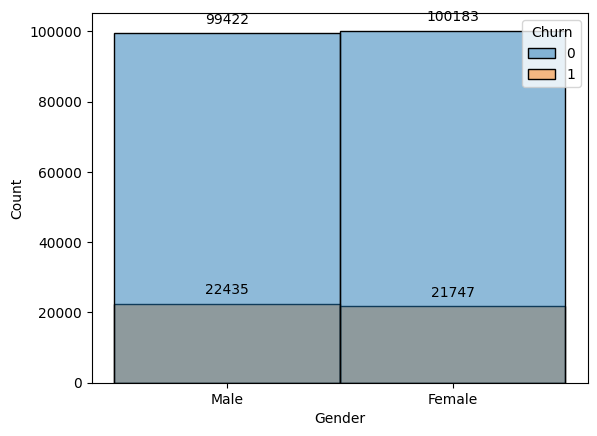

In [45]:
plot_binary_data(df, 'Gender')

> It appears that males are are slightly more likely to cancel when compared to females. However, that is not likely a statistically significant.

## WatchlistSize

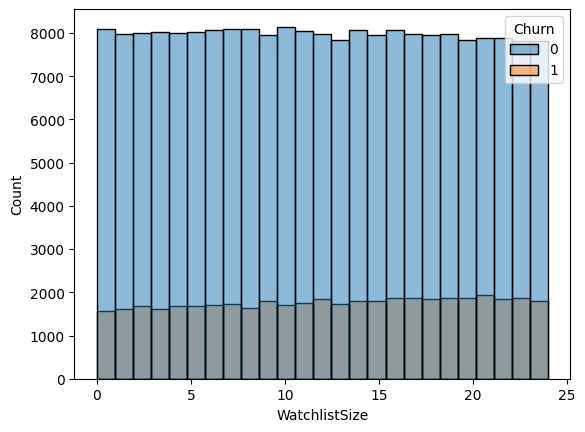

In [46]:
sns.histplot(df, x='WatchlistSize', hue='Churn', bins=25);

> The data appears to be evenly distributed.

In [47]:
check_for_correlation('WatchlistSize')

Correlation Coefficient: 0.02174
There is no strong correlation between `WatchlistSize` and `Churn`


## ParentalControl

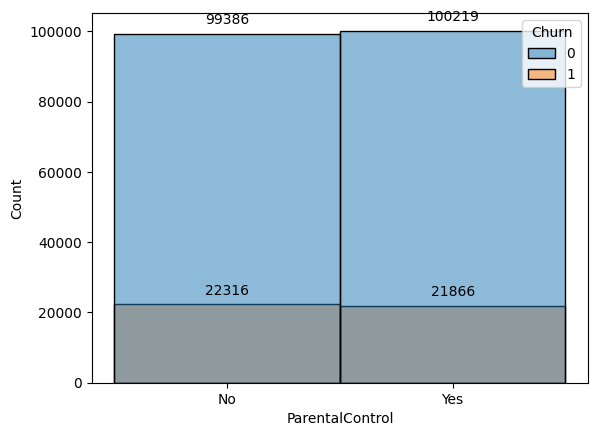

In [48]:
plot_binary_data(df, 'ParentalControl')

> The data appears to be evenly distributed.

## SubtitlesEnabled

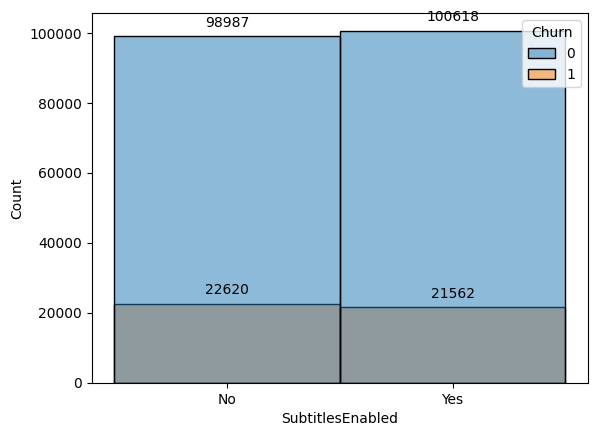

In [49]:
plot_binary_data(df, 'SubtitlesEnabled')

> The data appears to be evenly distributed.

## Churn

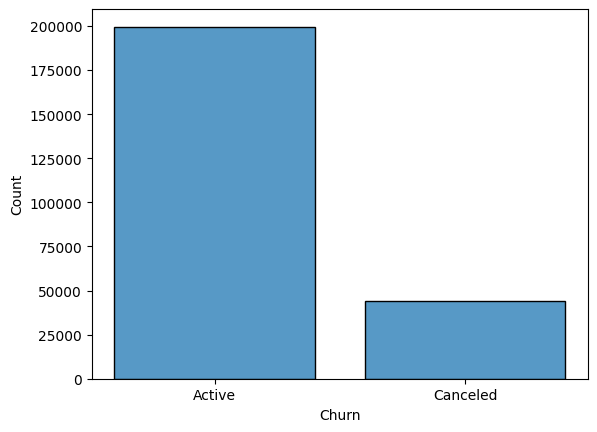

In [213]:
sns.histplot(df['Churn'], bins=2, discrete=True, stat='count', multiple='stack', shrink=0.8)

plt.xticks(ticks=[0, 1], labels=['Active', 'Canceled']);

Total number of Canceled Customers is: 44182


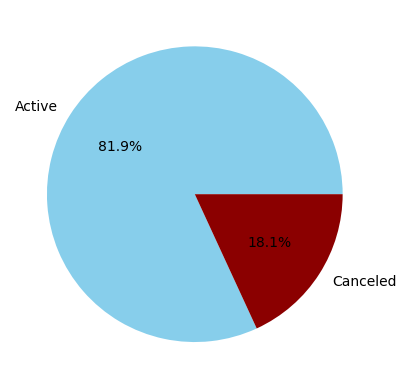

In [216]:
counts = df['Churn'].value_counts()
print(f'Total number of Canceled Customers is: {counts[1]}')

plt.pie(counts, labels=['Active', 'Canceled'], autopct='%1.1f%%', colors=['skyblue', 'darkred']);

> Basically, the goal is to find a model that can predict a user canceling > 81.9% accuracy.

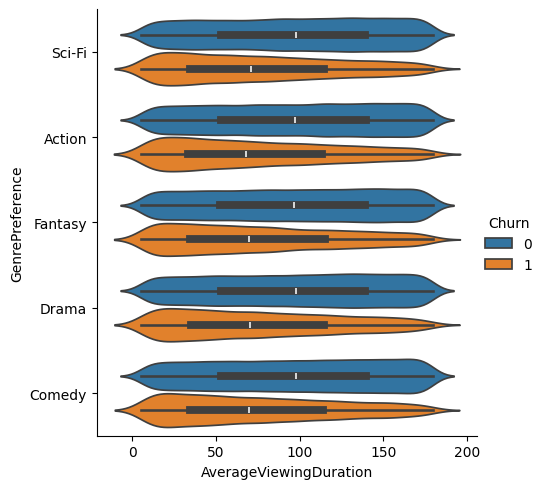

In [52]:
sns.catplot(df, x='AverageViewingDuration', y='GenrePreference', hue='Churn', kind='violin');

> I wanted to look at a few more characteristics of the data through various visualizations below.

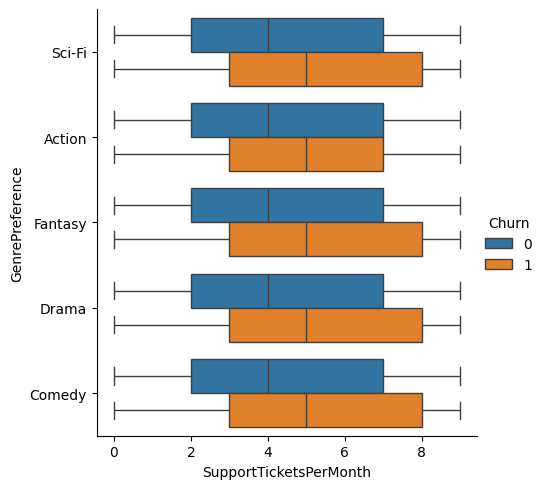

In [53]:
sns.catplot(df, x='SupportTicketsPerMonth', y='GenrePreference', hue='Churn', kind='box');

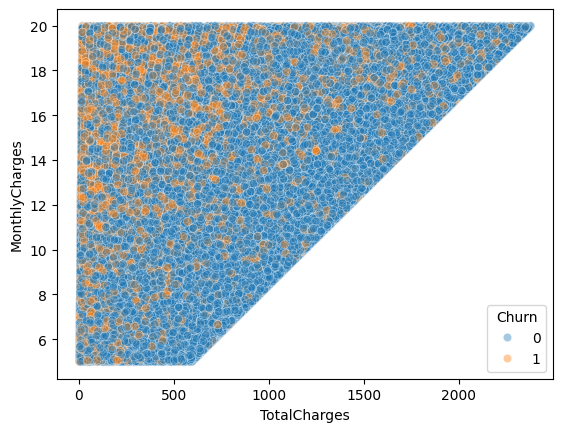

In [54]:
sns.scatterplot(df, x='TotalCharges', y='MonthlyCharges', hue='Churn', alpha=0.4);

> The scatter plot above feels overcrowded. I will take a sample and replot.

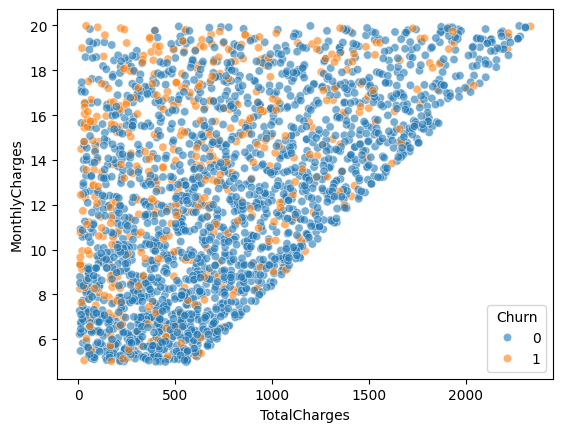

In [55]:
sample_df = df.sample(frac=0.01, random_state=101)
sns.scatterplot(sample_df, x='TotalCharges', y='MonthlyCharges', hue='Churn', alpha=0.6);

> I am unable to find a pattern visually from the data that might be an indicator when a customer is about to cancel.

### Look for Outliers

In [56]:
def check_for_outliers(df, x, num_std):
    """ 
    Checks the dataframe for outliers

    Parameters
    ----------
    df (pandas dataframe): data to be examined
    x (string): name of the data column
    num_std (float): the number of standard deviations away a value is allowed to be
    """
    x_mean = np.mean(df[x])
    x_std = np.std(df[x])
    vals_gt_2_stdev = df[(df[x] > x_mean + num_std * x_std) | (df['ViewingHoursPerWeek'] < x_mean - num_std * x_std)][x].count()
    print(f'Count greater than {num_std} stddev away from the mean ({round(x_mean, 1)}): {vals_gt_2_stdev}')

### MonthlyCharges

In [57]:
check_for_outliers(df, 'MonthlyCharges', 2)

Count greater than 2 stddev away from the mean (12.5): 17624


In [58]:
check_for_outliers(df, 'MonthlyCharges', 3)

Count greater than 3 stddev away from the mean (12.5): 0


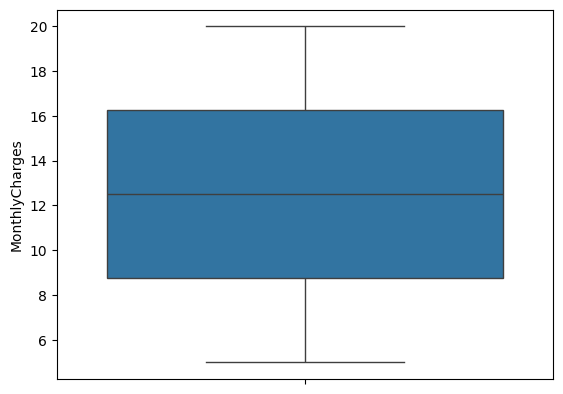

In [59]:
sns.boxplot(df['MonthlyCharges']);

> There are values greater than 2 standard deviations away from the mean for `Monthly Charges`. I will keep them because they are within 3 std dev away from the mean and this may occur naturally with the company's business model. If possible, I would verify these amounts were valid.

### TotalCharges

In [60]:
check_for_outliers(df, 'TotalCharges', 2.0)

Count greater than 2.0 stddev away from the mean (750.7): 10913


> 

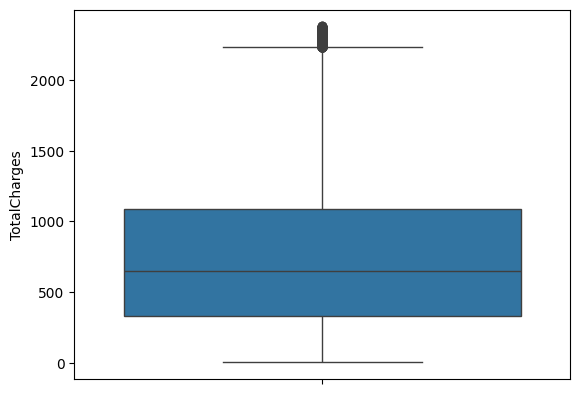

In [61]:
sns.boxplot(df['TotalCharges']);

In [62]:
check_for_outliers(df, 'TotalCharges', 3)

Count greater than 3 stddev away from the mean (750.7): 143


> It appears that there are quite a few values outside of 3 standard deviations away from the mean of `TotalCharges`. I will accept these because I assume they would happen naturally. 

### ViewingHoursPerWeek

In [63]:
check_for_outliers(df, 'ViewingHoursPerWeek', 2)

Count greater than 2 stddev away from the mean (20.5): 0


> All data is within 2 std dev away from the mean

### AverageViewingDuration

In [64]:
check_for_outliers(df, 'AverageViewingDuration', 2)

Count greater than 2 stddev away from the mean (92.3): 0


> All data is within 2 std dev away from the mean

### ContentDownloadsPerMonth

In [65]:
check_for_outliers(df, 'ContentDownloadsPerMonth', 2)

Count greater than 2 stddev away from the mean (24.5): 0


> All data is within 2 std dev form the mean

### UserRating

In [66]:
check_for_outliers(df, 'UserRating', 2)

Count greater than 2 stddev away from the mean (3.0): 0


> All `UserRating` data is within 2 stddev from the mean.

### SupportTicketsPerMonth

In [67]:
check_for_outliers(df, 'SupportTicketsPerMonth', 2)

Count greater than 2 stddev away from the mean (4.5): 0


> All `SupportTicketsPerMonth` data is within 2 standard deviations from the mean.

### WatchlistSize

In [68]:
check_for_outliers(df, 'WatchlistSize', 2)

Count greater than 2 stddev away from the mean (12.0): 0


> Data is within 2 standard deviations from the mean for `WatchlistSize`

> Organizing categorical and numerical data columns

In [69]:
categorical_data_cols = []
numerical_data_cols = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_data_cols.append(column)
    else:
        numerical_data_cols.append(column)

In [70]:
categorical_data_cols

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled']

In [71]:
numerical_data_cols

['MonthlyCharges',
 'TotalCharges',
 'ViewingHoursPerWeek',
 'AverageViewingDuration',
 'ContentDownloadsPerMonth',
 'UserRating',
 'SupportTicketsPerMonth',
 'WatchlistSize',
 'Churn']

<a id="model"></a>

<ul>
<li><a href="#top">Back to Top</a></li>
<li><a href="#source">Source a Dataset</a></li>
<li><a href="#hypothesis">Formulate a Hypothesis</a></li>
<li><a href="#datacleaning">Data Cleaning</a></li>
<li><a href="#visualizations">Visualizations for Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Insights</a></li>
</ul>

## Creating a Numerical Model

> Separating the features and the target variables

In [72]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

numerical_data_cols.remove('Churn')

> Inspecting the value counts for the categorical data

In [73]:
for cat in categorical_data_cols:
    print(f'{df[cat].value_counts()}\n')

SubscriptionType
Standard    81920
Basic       81050
Premium     80817
Name: count, dtype: int64

PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64

PaperlessBilling
No     121980
Yes    121807
Name: count, dtype: int64

ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64

MultiDeviceAccess
No     122035
Yes    121752
Name: count, dtype: int64

DeviceRegistered
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: count, dtype: int64

GenrePreference
Comedy     49060
Fantasy    48955
Drama      48744
Action     48690
Sci-Fi     48338
Name: count, dtype: int64

Gender
Female    121930
Male      121857
Name: count, dtype: int64

ParentalControl
Yes    122085
No     121702
Name: count, dtype: int64

SubtitlesEnabled
Yes    122180
No     121607
Name: count, dtype: int64



> Noting the following columsn can be converted to binary:  

> `PaperlessBilling`  
> `MultiDeviceAccess`  
> `ParentalControl`  
> `SubtitlesEnabled`  
> `Gender` -> `IsMale`

### Binary Values

> Using sklearn's LabelBinarizer to convert Binary data to 0's and 1's.  

> No's => 0's (False)
> Yes's => 1's (True)

In [74]:
lb = LabelBinarizer()

In [75]:
X.head()

MonthlyCharges  TotalCharges SubscriptionType     PaymentMethod  \
0           11.06        221.10          Premium      Mailed check   
1            5.18        294.99            Basic       Credit card   
2           12.11        883.79            Basic      Mailed check   
3            7.26        232.44            Basic  Electronic check   
4           16.95        966.33          Premium  Electronic check   

  PaperlessBilling ContentType MultiDeviceAccess DeviceRegistered  \
0               No        Both                No           Mobile   
1              Yes      Movies                No           Tablet   
2              Yes      Movies                No         Computer   
3               No    TV Shows                No           Tablet   
4              Yes    TV Shows                No               TV   

   ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth  \
0                36.76                   63.53                        10   
1                32.45                   25.73                        18   
2                 7.40                   57.36                        23   
3                27.96                  131.54                        30   
4                20.08                   45.36                        20   

  GenrePreference  UserRating  SupportTicketsPerMonth  Gender  WatchlistSize  \
0          Sci-Fi        2.18                       4    Male              3   
1          Action        3.48                       8    Male             23   
2         Fantasy        4.24                       6    Male              1   
3           Drama        4.28                       2    Male             24   
4          Comedy        3.62                       4  Female              0   

  ParentalControl SubtitlesEnabled  
0              No               No  
1              No              Yes  
2             Yes              Yes  
3             Yes              Yes  
4              No               No

In [76]:
X['PaperlessBilling'] = lb.fit_transform(X['PaperlessBilling'])

In [77]:
X['MultiDeviceAccess'] = lb.fit_transform(X['MultiDeviceAccess'])

In [78]:
X['ParentalControl'] = lb.fit_transform(X['ParentalControl'])

In [79]:
X['SubtitlesEnabled'] = lb.fit_transform(X['SubtitlesEnabled'])

In [80]:
X['IsMale'] = lb.fit_transform(X['Gender'])

In [81]:
X.drop('Gender', axis=1, inplace=True)

In [82]:
# replacing Gender with IsMale in categorical data columns list
categorical_data_cols = [string.replace("Gender", "IsMale") for string in categorical_data_cols]
categorical_data_cols

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'IsMale',
 'ParentalControl',
 'SubtitlesEnabled']

In [83]:
X.head()

MonthlyCharges  TotalCharges SubscriptionType     PaymentMethod  \
0           11.06        221.10          Premium      Mailed check   
1            5.18        294.99            Basic       Credit card   
2           12.11        883.79            Basic      Mailed check   
3            7.26        232.44            Basic  Electronic check   
4           16.95        966.33          Premium  Electronic check   

   PaperlessBilling ContentType  MultiDeviceAccess DeviceRegistered  \
0                 0        Both                  0           Mobile   
1                 1      Movies                  0           Tablet   
2                 1      Movies                  0         Computer   
3                 0    TV Shows                  0           Tablet   
4                 1    TV Shows                  0               TV   

   ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth  \
0                36.76                   63.53                        10   
1                32.45                   25.73                        18   
2                 7.40                   57.36                        23   
3                27.96                  131.54                        30   
4                20.08                   45.36                        20   

  GenrePreference  UserRating  SupportTicketsPerMonth  WatchlistSize  \
0          Sci-Fi        2.18                       4              3   
1          Action        3.48                       8             23   
2         Fantasy        4.24                       6              1   
3           Drama        4.28                       2             24   
4          Comedy        3.62                       4              0   

   ParentalControl  SubtitlesEnabled  IsMale  
0                0                 0       1  
1                0                 1       1  
2                1                 1       1  
3                1                 1       1  
4                0                 0       0

### Create Dummy Variables for the Following Features

`SubscriptionType`  
`PaymentMethod`  
`ContentType`   
`DeviceRegistered`  
`GenrePreference`  

In [84]:
df_dummies = pd.get_dummies(X, columns=['SubscriptionType', 'PaymentMethod', 'ContentType', 'DeviceRegistered', 'GenrePreference'])
df_dummies.columns

Index(['MonthlyCharges', 'TotalCharges', 'PaperlessBilling',
       'MultiDeviceAccess', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth',
       'WatchlistSize', 'ParentalControl', 'SubtitlesEnabled', 'IsMale',
       'SubscriptionType_Basic', 'SubscriptionType_Premium',
       'SubscriptionType_Standard', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'ContentType_Both', 'ContentType_Movies',
       'ContentType_TV Shows', 'DeviceRegistered_Computer',
       'DeviceRegistered_Mobile', 'DeviceRegistered_TV',
       'DeviceRegistered_Tablet', 'GenrePreference_Action',
       'GenrePreference_Comedy', 'GenrePreference_Drama',
       'GenrePreference_Fantasy', 'GenrePreference_Sci-Fi'],
      dtype='object')

### Numerical Data Scaling

In [85]:
stdscaler = StandardScaler()

In [86]:
df_dummies[numerical_data_cols].head()

MonthlyCharges  TotalCharges  ViewingHoursPerWeek  AverageViewingDuration  \
0           11.06        221.10                36.76                   63.53   
1            5.18        294.99                32.45                   25.73   
2           12.11        883.79                 7.40                   57.36   
3            7.26        232.44                27.96                  131.54   
4           16.95        966.33                20.08                   45.36   

   ContentDownloadsPerMonth  UserRating  SupportTicketsPerMonth  WatchlistSize  
0                        10        2.18                       4              3  
1                        18        3.48                       8             23  
2                        23        4.24                       6              1  
3                        30        4.28                       2             24  
4                        20        3.62                       4              0

In [87]:
for col in numerical_data_cols:
    df_dummies[col] = stdscaler.fit_transform(np.array(df_dummies[col]).reshape(len(df_dummies[col]), 1))

In [88]:
df_dummies[numerical_data_cols].head()

MonthlyCharges  TotalCharges  ViewingHoursPerWeek  AverageViewingDuration  \
0       -0.330596     -1.012558             1.445945               -0.568933   
1       -1.689315     -0.871297             1.062620               -1.317372   
2       -0.087967      0.254361            -1.165288               -0.691099   
3       -1.208680     -0.990879             0.663287                0.777662   
4        1.030434      0.412159            -0.037548               -0.928699   

   ContentDownloadsPerMonth  UserRating  SupportTicketsPerMonth  WatchlistSize  
0                 -1.005712   -0.712138               -0.175519      -1.253786  
1                 -0.450971    0.413142                1.216976       1.526687  
2                 -0.104258    1.070998                0.520728      -1.531833  
3                  0.381141    1.105622               -0.871766       1.665711  
4                 -0.312285    0.534326               -0.175519      -1.670857

In [89]:
df_dummies.head()

MonthlyCharges  TotalCharges  PaperlessBilling  MultiDeviceAccess  \
0       -0.330596     -1.012558                 0                  0   
1       -1.689315     -0.871297                 1                  0   
2       -0.087967      0.254361                 1                  0   
3       -1.208680     -0.990879                 0                  0   
4        1.030434      0.412159                 1                  0   

   ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth  \
0             1.445945               -0.568933                 -1.005712   
1             1.062620               -1.317372                 -0.450971   
2            -1.165288               -0.691099                 -0.104258   
3             0.663287                0.777662                  0.381141   
4            -0.037548               -0.928699                 -0.312285   

   UserRating  SupportTicketsPerMonth  WatchlistSize  ...  \
0   -0.712138               -0.175519      -1.253786  ...   
1    0.413142                1.216976       1.526687  ...   
2    1.070998                0.520728      -1.531833  ...   
3    1.105622               -0.871766       1.665711  ...   
4    0.534326               -0.175519      -1.670857  ...   

   ContentType_TV Shows  DeviceRegistered_Computer  DeviceRegistered_Mobile  \
0                 False                      False                     True   
1                 False                      False                    False   
2                 False                       True                    False   
3                  True                      False                    False   
4                  True                      False                    False   

   DeviceRegistered_TV  DeviceRegistered_Tablet  GenrePreference_Action  \
0                False                    False                   False   
1                False                     True                    True   
2                False                    False                   False   
3                False                     True                   False   
4                 True                    False                   False   

   GenrePreference_Comedy  GenrePreference_Drama  GenrePreference_Fantasy  \
0                   False                  False                    False   
1                   False                  False                    False   
2                   False                  False                     True   
3                   False                   True                    False   
4                    True                  False                    False   

   GenrePreference_Sci-Fi  
0                    True  
1                   False  
2                   False  
3                   False  
4                   False  

[5 rows x 32 columns]

<a id='validation'></a>

## Applying ML Models

## Split Data

In [219]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies, y, test_size=0.3, random_state=42)

### Logistic Regression

In [220]:
log_model = LogisticRegression()

In [221]:
lm_result = log_model.fit(X_train, y_train)

In [222]:
y_pred = log_model.predict(X_test)

In [223]:
lr_cm = confusion_matrix(y_test, y_pred)
lr_cm

array([[58694,  1229],
       [11663,  1551]])

0.8237280719745136


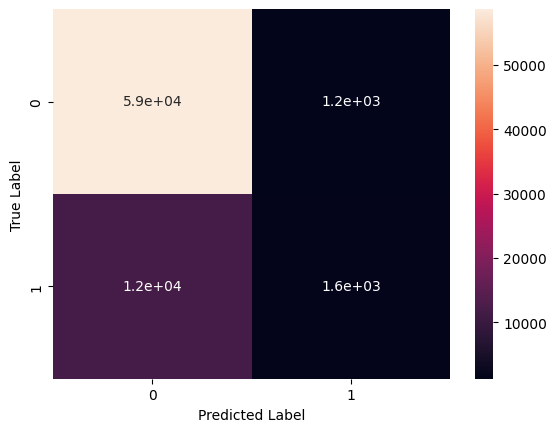

In [194]:
accuracy = log_model.score(X_test, y_test) 
print(accuracy)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label');

In [195]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     59923
           1       0.56      0.12      0.19     13214

    accuracy                           0.82     73137
   macro avg       0.70      0.55      0.55     73137
weighted avg       0.78      0.82      0.77     73137



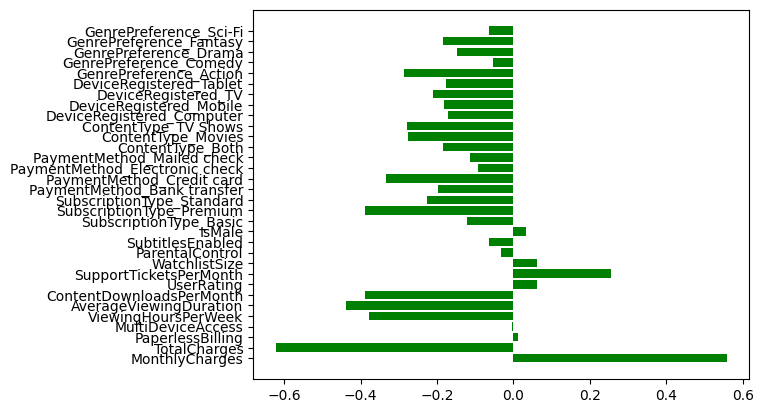

In [196]:
importance = log_model.coef_.flatten()
plt.barh(df_dummies.columns, importance, color='g');

### Logistic Regression with Fewer Features

In [185]:
df_short = df_dummies[['MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'SupportTicketsPerMonth', 'SubscriptionType_Premium', 'PaymentMethod_Credit card']]

In [186]:
X_train, X_test, y_train, y_test = train_test_split(df_short, y, test_size=0.3, random_state=42)

In [187]:
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
accuracy = log_model.score(X_test, y_test) 
print(accuracy)
print(classification_report(y_test, y_pred))

0.8237143990046077
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     59923
           1       0.56      0.11      0.19     13214

    accuracy                           0.82     73137
   macro avg       0.70      0.55      0.54     73137
weighted avg       0.78      0.82      0.77     73137



In [188]:
confusion_matrix(y_test, y_pred)

array([[58751,  1172],
       [11721,  1493]])

0.8237143990046077


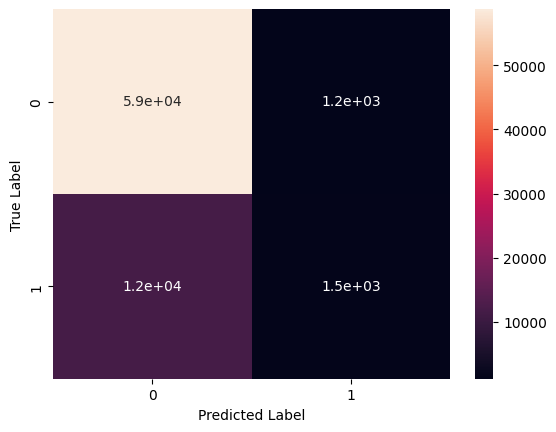

In [177]:
accuracy = log_model.score(X_test, y_test) 
print(accuracy)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label');

# [[TN, FP],
#  [FN, TP]]

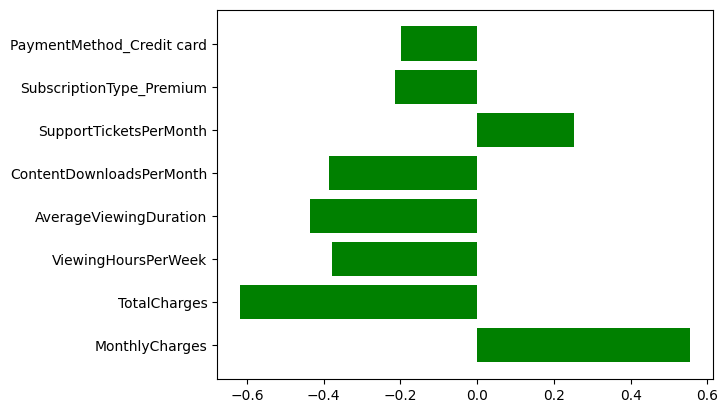

In [159]:
importance = log_model.coef_.flatten()
plt.barh(df_short.columns, importance, color='g');

> Nearly identical results with the logistic model with all of the features. However, there is a small dip in the recall and True Positives.

### Decision Tree

In [240]:
clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X_train, y_train)
clf_pred = clf.score(X_test, y_test)
clf_pred

0.8212395914516593

In [242]:
clf_y_pred = clf.predict(X_test)
cm_dt = confusion_matrix(y_test, clf_y_pred)
cm_dt

array([[59052,   871],
       [12203,  1011]])

### Support Vector Classification

In [103]:
svc = SVC(random_state=0)
svc.fit(X_train, y_train)

SVC(random_state=0)

In [104]:
svc_pred = svc.predict(X_test)

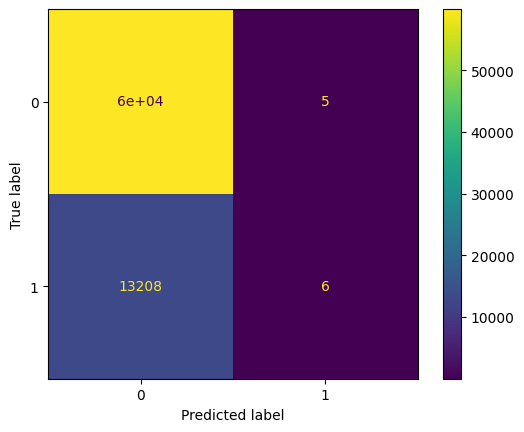

In [116]:
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test);

In [114]:
accuracy = svc.score(X_test, y_test)
accuracy

0.8193390486347539

> Although it is nearly as accurate, this model only correctly predicted 6 customers to cancel their service. 

> The first logistic model provided the highest level of accuracy with a higher precision and recall.

<a id='conclusions'></a>
## Insights

<ul>
<li><a href="#top">Back to Top</a></li>
<li><a href="#source">Source a Dataset</a></li>
<li><a href="#hypothesis">Formulate a Hypothesis</a></li>
<li><a href="#datacleaning">Data Cleaning</a></li>
<li><a href="#model">Numerical Model</a></li>
<li><a href="#apply">Applying Models</a></li>
</ul>

The first logistic regression model appears to be the best model for predicting if a user is going to churn. 

### Hypothesis

In [209]:
dummies_binary = df_dummies.replace({True: 1, False: 0})

In [210]:
model_stats = sm.Logit(y, dummies_binary).fit()

Optimization terminated successfully.
         Current function value: 0.413600
         Iterations 6


In [211]:
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:               243787
Model:                          Logit   Df Residuals:                   243757
Method:                           MLE   Df Model:                           29
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.1261
Time:                        07:34:55   Log-Likelihood:            -1.0083e+05
converged:                       True   LL-Null:                   -1.1537e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
MonthlyCharges                     0.5578      0.006     88.978      0.000       0.545       0.570
TotalCharges                      -0.6231      0.007    -93.976      0.000      -0.636      -0.610
PaperlessBilling                  -0.0024      0.011     -0.209      0.835      -0.024       0.020
MultiDeviceAccess                 -0.0056      0.011     -0.502      0.616      -0.028       0.016
ViewingHoursPerWeek               -0.3817      0.006    -66.224      0.000      -0.393      -0.370
AverageViewingDuration            -0.4377      0.006    -75.319      0.000      -0.449      -0.426
ContentDownloadsPerMonth          -0.3872      0.006    -67.086      0.000      -0.399      -0.376
UserRating                         0.0639      0.006     11.336      0.000       0.053       0.075
SupportTicketsPerMonth             0.2496      0.006     43.868      0.000       0.238       0.261
WatchlistSize                      0.0635      0.006     11.270      0.000       0.052       0.075
ParentalControl                   -0.0363      0.011     -3.223      0.001      -0.058      -0.014
SubtitlesEnabled                  -0.0639      0.011     -5.676      0.000      -0.086      -0.042
IsMale                             0.0387      0.011      3.439      0.001       0.017       0.061
SubscriptionType_Basic            -0.3021        nan        nan        nan         nan         nan
SubscriptionType_Premium          -0.5718        nan        nan        nan         nan         nan
SubscriptionType_Standard         -0.4018        nan        nan        nan         nan         nan
PaymentMethod_Bank transfer       -0.3305   8.91e+04  -3.71e-06      1.000   -1.75e+05    1.75e+05
PaymentMethod_Credit card         -0.4672    9.2e+04  -5.08e-06      1.000    -1.8e+05     1.8e+05
PaymentMethod_Electronic check    -0.2291   9.11e+04  -2.51e-06      1.000   -1.79e+05    1.79e+05
PaymentMethod_Mailed check        -0.2490   9.34e+04  -2.67e-06      1.000   -1.83e+05    1.83e+05
ContentType_Both                  -0.3689   4.21e+05  -8.76e-07      1.000   -8.26e+05    8.26e+05
ContentType_Movies                -0.4557   4.11e+05  -1.11e-06      1.000   -8.05e+05    8.05e+05
ContentType_TV Shows              -0.4512   4.18e+05  -1.08e-06      1.000   -8.19e+05    8.19e+05
DeviceRegistered_Computer         -0.3135   1.69e+05  -1.85e-06      1.000   -3.32e+05    3.32e+05
DeviceRegistered_Mobile           -0.3080   1.77e+05  -1.74e-06      1.000   -3.47e+05    3.47e+05
DeviceRegistered_TV               -0.3370   1.68e+05     -2e-06      1.000   -3.29e+05    3.29e+05
DeviceRegistered_Tablet           -0.3172   1.68e+05  -1.89e-06      1.000   -3.28e+05    3.28e+05
GenrePreference_Action            -0.3750        nan        nan        nan         nan         nan
GenrePreference_Comedy            -0.1673        nan        nan        nan         nan         nan
GenrePreference_Drama             -0.2657        nan        nan        na

> Looking at the `LLR p-value`, it is 0.000, below 0.05. Therefore, with the current data and models, I can accept the null hypothesis that we cannot predict whether or not a customer is going to churn.

In [232]:
tp_total = lr_cm[1][1]
total_churn = df['Churn'].sum()
print(f'Percent of Churn Customers Predicted Correctly: {tp_total/total_churn*100:.2f}%')

Percent of Churn Customers Predicted Correctly: 3.51%


### If ML Model Was Used to Target Customers About to Churn

In [218]:
average_monthly_cost = df['TotalCharges'].mean()
average_monthly_cost

750.7410169533238

In [236]:
amount_saved = format(tp_total * average_monthly_cost, '.2f')
amount_saved

'1164399.32'

### Conclusion

In [237]:
lr_cm

array([[58694,  1229],
       [11663,  1551]])

### Using the Model
Although we only correctly predicted 3.5% of customers who would churn, this model can still be valuable. There is about $1.2 in revenue that could be recovered if the marketing team could target these customers before they canceled.  

### Next Steps
Next steps would be exploring other ML models to attempt at reducing the amount of False Negatives. In addition, speaking with the data engineers who collected the data to validate it. Across nearly all of the features, the data was evenly distributed.
